In [1]:
import pandas as pd
import tensorflow as tf
import classification_utils
import numpy as np

2022-11-25 17:20:08.516082: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-25 17:20:08.708196: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-25 17:20:08.708236: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-11-25 17:20:09.945254: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-

In [4]:
df = pd.read_csv("./dataset/users_df_dataset_cleaned_with_indicators.csv")
# TODO check if it is the latest dataset

In [5]:
df.columns.values.tolist()

['id', 'name', 'lang', 'bot', 'created_at', 'statuses_count']

In [4]:
to_drop = ["user_id", "name", "created_at", "day_with_most_tweets"]
to_discretize = ["lang"]

df.drop(to_drop, axis=1, inplace=True)
df = classification_utils.discretize_data(df, to_discretize)
df.drop(to_discretize, axis=1, inplace=True)
# TODO after the dataset update check again

In [5]:
df.head()

,bot,statuses_count,account_age_in_days,number_of_tweets,account_average_tweets_per_day,avg_tweets_per_actual_day,max_number_of_tweets_in_a_day,entropy_for_day,entropy_for_hour,entropy_for_minute,...,account_discussion_creation_ratio,tweet_num_likes_ratio,tweet_num_replies_ratio,entropy_original_text,entropy_text,mean_inactive_period_length_in_seconds,median_inactive_period_length_in_seconds,mode_inactive_period_length_in_seconds,mode_count,lang_num
0,1,76,1314,126,0.057839,4.666667,18,2.903992,2.762944,1.867539,...,25.200000,25.200000,0.0,6.850296,1.617447e-06,1.099118e+05,24.5,0.0,8,5
1,0,54,1311,116,0.041190,4.640000,17,2.942683,2.881816,1.909614,...,38.666667,19.333333,0.0,6.651084,1.323339e-06,1.170971e+05,22.0,0.0,12,5
2,1,3,2709,4,0.001107,2.000000,3,1.000000,0.918296,0.918296,...,0.000000,0.000000,0.0,1.500000,2.029541e-07,8.816991e+06,32322.0,0.0,1,5
3,1,50,2080,1358,0.024038,8.035503,143,3.543607,1.320785,0.474758,...,1.144061,5.388889,0.0,10.153175,2.167859e-05,6.557065e+04,3327.0,0.0,109,12
4,0,7085,1198,3434,5.914023,28.380165,50,4.253096,1.705484,0.510899,...,57.233333,16.122066,0.0,11.420705,2.582894e-07,8.020619e+03,2090.5,7200.0,322,5


In [6]:
from sklearn.model_selection import train_test_split

label = df['bot']#.pop("bot")

train_ratio = 0.7
validation_ratio = 0.2
test_ratio = 0.1

x_train_val, x_test, y_train_val, y_test = train_test_split(df, label, shuffle=True, test_size= test_ratio)
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, shuffle=True, test_size=validation_ratio/(train_ratio + validation_ratio) )




In [7]:
x_train.head()

,bot,statuses_count,account_age_in_days,number_of_tweets,account_average_tweets_per_day,avg_tweets_per_actual_day,max_number_of_tweets_in_a_day,entropy_for_day,entropy_for_hour,entropy_for_minute,...,account_discussion_creation_ratio,tweet_num_likes_ratio,tweet_num_replies_ratio,entropy_original_text,entropy_text,mean_inactive_period_length_in_seconds,median_inactive_period_length_in_seconds,mode_inactive_period_length_in_seconds,mode_count,lang_num
5944,1,67,1316,130,0.050912,5.416667,18,2.990602,2.772254,2.020023,...,65.000000,11.818182,0.0,6.837752,1.689447e-06,108035.376923,21.0,0.0,12,5
2208,0,68,2566,3489,0.026500,166.142857,336,4.392317,5.131171,1.743914,...,0.000344,2.653232,0.0,11.607444,3.661198e-07,41773.748352,32.0,0.0,277,5
5992,0,438,2384,467,0.183725,6.970149,26,3.852528,2.023842,0.489682,...,0.016761,12.289474,0.0,8.700255,2.063208e-07,278274.680942,1138.0,0.0,39,5
2289,0,811,1304,829,0.621933,7.401786,62,3.874234,2.431329,0.816409,...,0.001092,1.594231,0.0,9.545650,2.757691e-07,44284.375151,402.0,0.0,62,5
5604,0,36,1919,41,0.018760,1.242424,3,0.851001,0.787005,0.787005,...,0.004395,0.000000,0.0,5.113650,6.333012e-07,685050.560976,262599.0,0.0,5,5


In [8]:
#x_train = np.asarray(x_train).astype("float32")
#x_train = np.reshape(x_train, ( x_train.shape[0], 1, x_train.shape[1]))
#
#
#x_val = np.asarray(x_val).astype("float32")
#x_val = np.reshape(x_val, ( x_val.shape[0], 1, x_val.shape[1]))
#
#
#x_test = np.asarray(x_test).astype("float32")
#x_test = np.reshape(x_test, ( x_test.shape[0], 1, x_test.shape[1]))
#
#
#y_train = np.asarray(y_train).astype("float32")
#y_train = np.reshape(y_train, (-1, 1))
#
#y_val = np.asarray(y_val).astype("float32")
#y_val = np.reshape(y_val, (-1, 1))
#
#y_test = np.asarray(y_test).astype("float32")
#y_test = np.reshape(y_test, (-1, 1))

In [9]:
x_train = np.asarray(x_train).astype("float32")
x_train = np.reshape(x_train, ( x_train.shape[0], x_train.shape[1]))


x_val = np.asarray(x_val).astype("float32")
x_val = np.reshape(x_val, ( x_val.shape[0], x_val.shape[1]))


x_test = np.asarray(x_test).astype("float32")
x_test = np.reshape(x_test, ( x_test.shape[0], x_test.shape[1]))


y_train = np.asarray(y_train).astype("float32")
y_train = np.reshape(y_train, (-1, 1))

y_val = np.asarray(y_val).astype("float32")
y_val = np.reshape(y_val, (-1, 1))

y_test = np.asarray(y_test).astype("float32")
y_test = np.reshape(y_test, (-1, 1))

In [10]:
x_train.shape

(7776, 29)

Epoch 1/200
4/4 [==============================] - 2s 87ms/step - loss: 0.8102 - accuracy: 0.5649 - val_loss: 0.5825 - val_accuracy: 0.6512
Epoch 2/200
4/4 [==============================] - 0s 37ms/step - loss: 0.5687 - accuracy: 0.6412 - val_loss: 0.4966 - val_accuracy: 0.7705
Epoch 3/200
4/4 [==============================] - 0s 40ms/step - loss: 0.5001 - accuracy: 0.7789 - val_loss: 0.5306 - val_accuracy: 0.7700
Epoch 4/200
4/4 [==============================] - 0s 37ms/step - loss: 0.5050 - accuracy: 0.7784 - val_loss: 0.4969 - val_accuracy: 0.7723
Epoch 5/200
4/4 [==============================] - 0s 39ms/step - loss: 0.4887 - accuracy: 0.7823 - val_loss: 0.5066 - val_accuracy: 0.7781
Epoch 6/200
4/4 [==============================] - 0s 36ms/step - loss: 0.4908 - accuracy: 0.7847 - val_loss: 0.4904 - val_accuracy: 0.7768
Epoch 7/200
4/4 [==============================] - 0s 37ms/step - loss: 0.4804 - accuracy: 0.7831 - val_loss: 0.4928 - val_accuracy: 0.7777
Epoch 8/200
4/4 [===

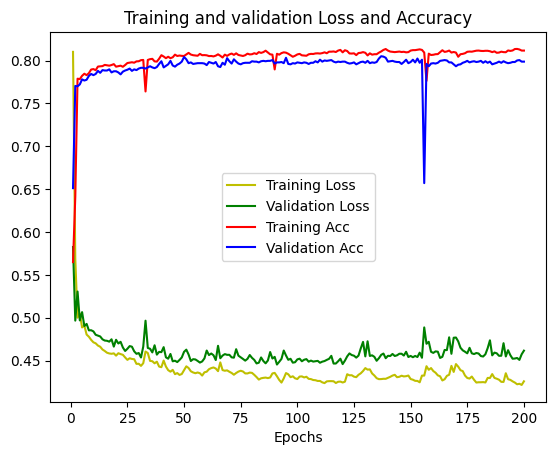

In [14]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(len(df.columns),)),
  tf.keras.layers.Dense(512, activation='sigmoid'), 
  tf.keras.layers.Dense(256, activation='sigmoid'),
  tf.keras.layers.Dense(128, activation='sigmoid'),  
  tf.keras.layers.Dense(1, activation='sigmoid')
])


model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.005),
              loss=tf.keras.losses.binary_crossentropy,
              metrics=[tf.keras.metrics.BinaryAccuracy(name="accuracy")]
)

history = model.fit(
  x=x_train,
  y=y_train,
  batch_size=2048,
  epochs=200,
  validation_data=(x_val, y_val)
)

classification_utils.print_training_stats(history=history)

In [15]:
train_pred = (model.predict(x_train) > 0.5).astype("bool")
correct_train = 0
for (pred, expected) in zip(train_pred, y_train):
    if pred == expected:
        correct_train +=1

val_pred = (model.predict(x_val) > 0.5).astype("bool")
correct_val = 0
for (pred, expected) in zip(val_pred, y_val):
    if pred == expected:
        correct_val +=1

print("Training set:", correct_train , "correct over", len(x_train), "\nAccuracy in train:", correct_train/len(x_train))
print("Validation set:", correct_val , "correct over", len(x_val), "\nAccuracy in validation:", correct_val/len(x_val))


70/70 [==============================] - 0s 2ms/step
Training set: 6315 correct over 7776 
Accuracy in train: 0.8121141975308642
Validation set: 1775 correct over 2222 
Accuracy in validation: 0.7988298829882988


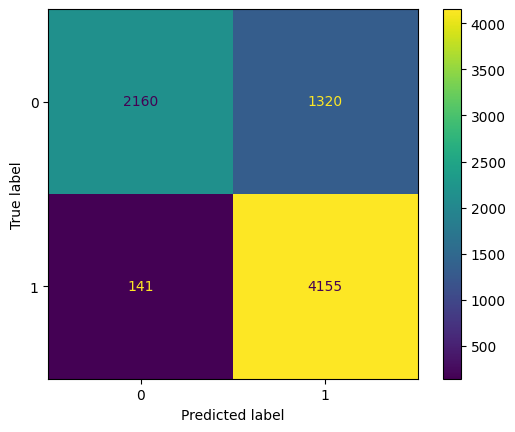

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_train, train_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()